# Example Use

How to use the main class.

In [1]:
import sys
sys.path.append('..')
from causal_faker import CausalFaker

%matplotlib inline

The idea is to specify a graph of interdependence of variables in the form of a weighted DAG.

Each variable is computed from the variables that feed into it.

If nothing feeds into the node then its value is drawn from a random variable.

A simple example will explain the idea.

In [2]:
edges = {
    (0, 1) : 0.2,
    (0, 2) : 0.4,
    (1, 2) : -0.1
    }

In [3]:
cf = CausalFaker(edges)

Nodes 1 and two are inversely correlated, but a cofounder (node 0) correlates positively with both.

The values of 1 and two are completely determined by the value of node zero.

But the value of node 0 is determined at random.

The model assumes that the relationships are linear, and that the random noise is drawn from N(0,1).

We can draw this simple graph ...

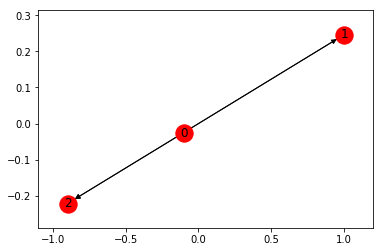

In [4]:
cf.draw()

We can also draw one set of random variables from it ...

In [5]:
cf.get_values()

{0: 0.9560537207447469, 1: 0.1912107441489494, 2: 0.3633004138830038}

Or we can draw n sets of variables from it.

In [6]:
cf.get_n(10)

[{0: -0.5904222324294037, 1: -0.11808444648588075, 2: -0.22436044832317342},
 {0: -1.8231001543304886, 1: -0.36462003086609773, 2: -0.6927780586455857},
 {0: -1.6584125428671719, 1: -0.3316825085734344, 2: -0.6301967662895254},
 {0: 0.6510531110223744, 1: 0.13021062220447488, 2: 0.24740018218850227},
 {0: -0.34658951230454443, 1: -0.0693179024609089, 2: -0.1317040146757269},
 {0: 0.25550682081154386, 1: 0.051101364162308774, 2: 0.09709259190838668},
 {0: -0.9247434535447974, 1: -0.18494869070895947, 2: -0.351402512347023},
 {0: -1.219899599036424, 1: -0.24397991980728484, 2: -0.4635618476338412},
 {0: -0.7085979071755496, 1: -0.14171958143510993, 2: -0.26926720472670884},
 {0: -0.17596960080762084, 1: -0.035193920161524166, 2: -0.06686844830689591}]

We can also pipe this into pandas ...

In [14]:
df = cf.get_df(10)
df.head()

,0,1,2
0,-1.111677,-0.222335,-0.422437
1,0.220649,0.044130,0.083847
2,-1.726261,-0.345252,-0.655979
3,-1.097414,-0.219483,-0.417017
4,-0.138722,-0.027744,-0.052714


In [15]:
df = cf.get_df(10, named_cols=True)
df.head()

,x_0,x_1,x_2
0,0.826519,0.165304,0.314077
1,-1.056936,-0.211387,-0.401636
2,0.911306,0.182261,0.346296
3,0.112524,0.022505,0.042759
4,-2.758457,-0.551691,-1.048214


Observe the correlation between nodes 1 and 2. They are positively correlated, even though I specified a negative correlation, this is because of the counfounding node 0.

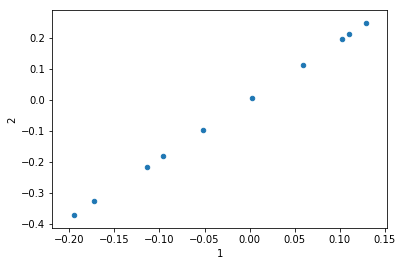

In [9]:
df.plot.scatter(1, 2)

Another example. If we want to add noise to the inputs of nodes 1 and 2 we can do this by specifying two addtional nodes like so>

In [10]:
edges = {
    (0, 1) : 0.2,
    (0, 2) : 0.4,
    (1, 2) : -0.1,
    (3, 1) : .1,
    (4, 2) : .1
    }

cf2 = CausalFaker(edges)

Running the draw function a few times can be useful, to get a better layout...

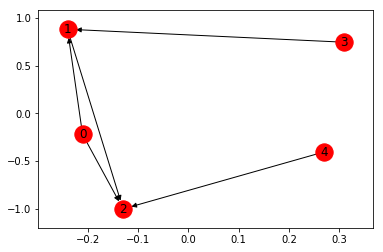

In [11]:
cf2.draw()

Now the correlation should persist, but with some additional noise.

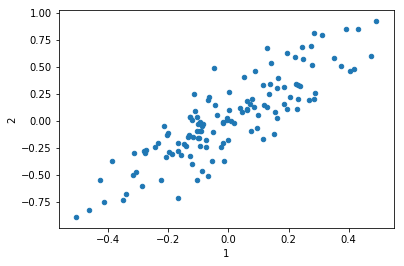

In [12]:
cf2.get_df(128).plot.scatter(1, 2)

That's basically the idea, but more complex causal graphs can be built up in a smilar manner.

### Cycles

Specifying a graph with a cycle raises and error, as this simple example shows.

In [13]:
CausalFaker(
    {
        (0, 1): 1,
        (1, 2): 1,
        (2, 0): 1
    }
)

Maximum level exceeded, which means your graph has cycles


CycleError: 

### Other convinience functions

Currently you specify your graph with a dictionary of edges. The keys are two-tuples, specifying an edge, and the values are the wieght (as we see in the examples above).

However, you can also get back you graph in other forms, such as:

In [16]:
cf.adjaceny_matrix

array([[ 0. ,  0.2,  0.4],
       [ 0. ,  0. , -0.1],
       [ 0. ,  0. ,  0. ]])

In [17]:
cf.scipy_sparse

<3x3 sparse matrix of type '<class 'numpy.float32'>'
	with 3 stored elements in Dictionary Of Keys format>

In [18]:
cf.networkx

Pretty print it ...

In [19]:
from random import random
weights = {
    (0, 1): random()*2 - 1,
    (1, 4): random()*2 - 1,
    (1, 5): random()*2 - 1,
    (2, 3): random()*2 - 1,
    (3, 1): random()*2 - 1,
    (3, 4): random()*2 - 1,
    (4, 5): random()*2 - 1
}

cf = CausalFaker(weights)
    
cf.pretty_print_equation()

x_0 = N(0, 1)
x_1 = 0.797*x_0 + 0.334*x_3
x_2 = N(0, 1)
x_3 = -0.325*x_2
x_4 = -0.264*x_1 + -0.413*x_3
x_5 = 0.191*x_1 + 0.114*x_4


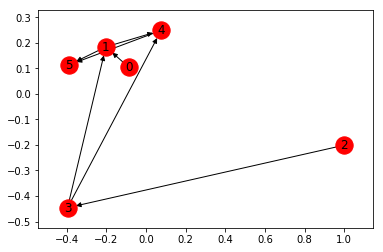

In [20]:
cf.draw()

In [21]:
df = cf.get_df(1000)

In [22]:
from seaborn import pairplot

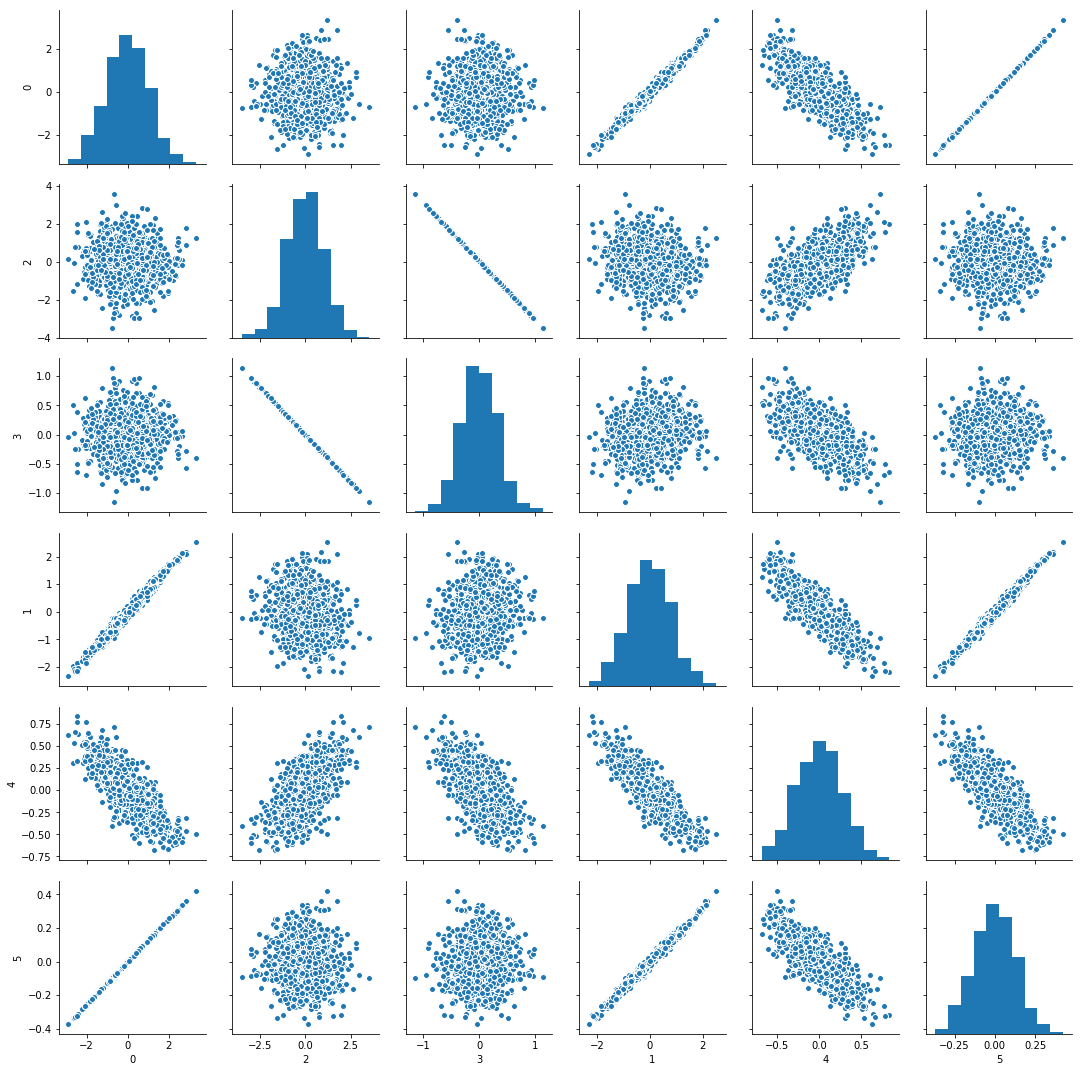

In [23]:
pairplot(df)